In [4]:
import pandas as pd
import json
import pickle

# DATASET YELP

## archivo business.pkl

In [185]:
df_business= pd.read_pickle('C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\yelp\\business.pkl')

In [ ]:
# Enumeramos cada columna para distinguirlas
df_business.columns = [f'{col}_{i}' if df_business.columns.duplicated().any() else col for i, col in enumerate(df_business.columns)]

In [ ]:
# Borramos columnas 
df_business = df_business.drop(columns=["business_id_14","name_15","address_16","city_17","state_18","postal_code_19","latitude_20","longitude_21","stars_22","review_count_23"	,"is_open_24","attributes_25","categories_26","hours_27"])

In [ ]:
# Renombramos columnas
df_business = df_business.rename(columns={'business_id_0': 'business_id', 
                            'name_1': 'name',
                            'address_2': 'address',
                            'city_3': 'city',
                            'state_4': 'state',
                            'postal_code_5': 'postal_code',
                            'latitude_6': 'latitude',
                            'longitude_7': 'longitude',
                            'stars_8': 'stars',
                            'review_count_9': 'review_count',
                            'is_open_10': 'is_open',
                            'attributes_11': 'attributes',
                            'categories_12': 'categories',
                            'hours_13': 'hours'})

In [ ]:
df_business.to_csv("df_business.csv")

In [10]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    150346 non-null  int64  
 1   business_id   150346 non-null  object 
 2   name          150346 non-null  object 
 3   address       145219 non-null  object 
 4   city          150346 non-null  object 
 5   state         150343 non-null  object 
 6   postal_code   150273 non-null  object 
 7   latitude      150346 non-null  float64
 8   longitude     150346 non-null  float64
 9   stars         150346 non-null  float64
 10  review_count  150346 non-null  int64  
 11  is_open       150346 non-null  int64  
 12  attributes    136602 non-null  object 
 13  categories    150243 non-null  object 
 14  hours         127123 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 17.2+ MB


Valores nulos

In [161]:
df_business["attributes"].isnull().sum()

13744

Duplicados

In [162]:
duplicados = df_business[df_business["business_id"].duplicated()]

Cantidad de restaurantes en Florida

In [180]:
# Filtramos bussines que sean restaurantes
df_Restaurant_yelp = df_business[df_business['categories'].astype(str).str.contains('Restaurant', case=False)]

In [181]:
# Filtramos el estado florida con la columna "address"
df_business_florida = df_Restaurant_yelp[df_Restaurant_yelp["state"]== "FL"]

# Ciudades que no hay que filtrar
Ciudades = ['Fort Lauderdale', 'Miami', 'Miami Gardens',"Boca Raton"]

# Filtrar las filas que contienen los términos definidos
filtrados = df_business_florida[df_business_florida['address'].str.contains('|'.join(Ciudades), na=False,case=False)]

# Obtener las filas no filtradas del DataFrame original
df_florida_yelp = df_business_florida[~df_business_florida.index.isin(filtrados.index)]

cantidad = df_florida_yelp["business_id"].count()
print(f"{cantidad} restaurantes existen en florida")

9187 restaurantes existen en florida


Restaurantes que tienen el servicio de delivery en florida

In [182]:
# Rellenamos valores faltantes
df_florida_yelp['attributes'].fillna('', inplace=True)
# Observamos los restaurantes que tienen dleivery
resultados = df_florida_yelp[df_florida_yelp['attributes'].str.contains("'RestaurantsDelivery': 'True'", case=False)]
resultados

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
14,14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'..."
82,82,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,FL,19104,39.954573,-75.194894,3.0,56,1,"{'Alcohol': ""u'none'"", 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
188,188,QjV4v7q_pt7tt3K1US7IHg,PDQ Temple Terrace,5112 E Fowler Ave,Tampa,FL,33617,28.054888,-82.399548,3.0,5,1,"{'RestaurantsReservations': 'False', 'Business...","Fast Food, Sandwiches, Chicken Shop, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
191,191,59jkCUm4yHciKL1KW_1HJA,Roma Pizza & Italian Eatery,1103 Main St,Warrington,FL,18976,40.229527,-75.131090,2.5,25,1,"{'BikeParking': 'False', 'RestaurantsGoodForGr...","Pizza, Restaurants","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'..."
200,200,vPcfJ3rm3NpdqVDod2WxLA,China Pearl,2E Summit Sq Shopping Ctr,Langhorne,FL,19047,40.217784,-74.926586,1.5,27,1,"{'OutdoorSeating': 'False', 'RestaurantsDelive...","Japanese, Chinese, Restaurants, Thai","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150146,150146,Cq3pmXsd5k4Z9zPlYkTvxQ,Hsu's Hunan Yu,11539 Gravois Rd,Saint Louis,FL,63126,38.537932,-90.378385,3.5,50,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Chinese, Restaurants","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:..."
150175,150175,3u5qUgOrgczTdCUhb0kKow,Verona Pizza,8910 W Chester Pike,Upper Darby,FL,19082,39.967261,-75.289625,3.0,66,1,"{'Alcohol': ""u'beer_and_wine'"", 'DogsAllowed':...","Burgers, Salad, Pizza, Restaurants, Sandwiches","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
150205,150205,Agh0Z_PACmbdEpLyjvuwZg,Chick-fil-A,6240 E Whitestown Pkwy,Whitestown,FL,46075,39.949502,-86.349949,2.5,32,1,"{'BusinessParking': ""{'garage': False, 'street...","Chicken Shop, Caterers, Fast Food, Restaurants...","{'Monday': '0:0-0:0', 'Tuesday': '6:30-21:0', ..."
150214,150214,2xxkaRy7rP5EUyjFt2J5kA,Nikka Ramen,5701 Calle Real,Goleta,FL,93117,34.440885,-119.823523,4.5,562,1,"{'ByAppointmentOnly': 'False', 'Alcohol': ""u'b...","Restaurants, Japanese, Ramen","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2..."


De los 9.187 restaurantes ubicados en Florida, se identificó que 4.835 ofrecen servicio de entrega a domicili

In [179]:
df_business = pd.read_csv("df_business.csv")

## Archivo "tip.json"

In [ ]:
# Abrimos archivo "tip.json"
datos = []
with open('C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\yelp\\tip.json',"r",encoding="utf-8") as archivo:
    for linea in archivo:
        objeto_json = json.loads(linea)
        datos.append(objeto_json)

df_tip = pd.DataFrame(datos)

In [ ]:
df_tip.to_csv("df_tip.csv")

In [ ]:
df_tip = pd.read_csv("df_tip.csv")
df_tip

,Unnamed: 0,user_id,business_id,text,date,compliment_count
0,0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...,...
908910,908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


## Abrimos archivo reviews.json

In [144]:
import pandas as pd

# Lee las primeras 100 filas del archivo
primeros_100_registros = pd.read_json('C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\yelp\\review.json',lines=True, nrows=500000)

primeros_100_registros


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
499995,q4Z6NCR1IMRdpPorTD89Tg,tCPzvPwsd_DwBx6whsDlLQ,-QwHN9KoluPcA0YFllwFYQ,5,0,0,0,We won the Playoff game last night and is sche...,2021-06-30 16:14:03
499996,KTg0i04SbVWGWHHJmGOI_A,rj0uSTXu1rPVgAfOMHYltQ,t_v2TyjeqaRkrfZKudY9cA,5,0,0,0,We have been a resident almost 4 years at Manz...,2021-03-24 20:21:27
499997,ZuMNAPcArFtaGufe-nwGOA,MVqzYt-E7y1Mdw9F_7nLjw,3XirYkP9PJvVXIEDPNNXLA,4,0,0,0,This place is hyped as one of the best places ...,2021-07-03 04:51:07
499998,Lohri9uZyvoNnH5z_NT6DA,vn777Y2vCynYYUYJjNYdYg,gfPDLZimZu1NtBIDbeXetg,2,1,0,0,Saw the reviews so thought I'd try this place....,2019-04-16 23:28:41


In [145]:
memoria_utilizada = primeros_100_registros.memory_usage().sum()
memoria_utilizada

36000128

In [146]:
primeros_100_registros.to_csv("df_reviews.csv")

## Abrimos archivo "checkin.json"

In [ ]:

datos = []
with open('C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\yelp\\checkin.json',"r") as archivo:
    for linea in archivo:
        objetos = json.loads(linea)
        datos.append(objetos)

df_checkin = pd.DataFrame(datos)

In [ ]:
df_checkin

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,"2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013..."
131926,zznZqH9CiAznbkV6fXyHWA,2021-06-12 01:16:12
131927,zzu6_r3DxBJuXcjnOYVdTw,"2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012..."
131928,zzw66H6hVjXQEt0Js3Mo4A,"2016-12-03 23:33:26, 2018-12-02 19:08:45"


In [ ]:
df_checkin.describe()

,business_id,date
count,131930,131930
unique,131930,131930
top,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
freq,1,1


## Abrimos archivo user.parquet

In [56]:
archivo = "C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\yelp\\user.parquet"
df_User_yelp = pd.read_parquet(archivo)

# DATASET GOOGLE MAPS

## Sitios

Abrimos archivo "1.json"

In [173]:
df_Restaurant = pd.read_csv("C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\df_Restaurant.csv")

In [1]:
archivo = "C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\Google maps\\metadata-sitios\\1.json"

datos = []
with open(archivo,"r") as archivo:
    for linea in archivo:
        objetos = json.loads(linea)
        datos.append(objetos)

df_sitios_1 = pd.DataFrame(datos)

NameError: name 'json' is not defined

Abrimos archivo "2.json"

In [ ]:
archivo = "C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\Google maps\\metadata-sitios\\2.json"

datos = []
with open(archivo,"r") as archivo:
    for linea in archivo:
        objetos = json.loads(linea)
        datos.append(objetos)

df_sitios_2 = pd.DataFrame(datos)


Abrimos archivo "3.json"

In [ ]:
archivo = "C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\Google maps\\metadata-sitios\\3.json"

datos = []
with open(archivo,"r") as archivo:
    for linea in archivo:
        objetos = json.loads(linea)
        datos.append(objetos)

df_sitios_3 = pd.DataFrame(datos)

Abrimos archivo "4.json"

In [6]:
archivo = "C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\Google maps\\metadata-sitios\\4.json"

import json
import pandas as pd
datos = []
with open(archivo,"r") as archivo:
    for linea in archivo:
        objetos = json.loads(linea)
        datos.append(objetos)

df_sitios_4 = pd.DataFrame(datos)

Abrimos archivo "5.json"

In [8]:
archivo = "C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\Google maps\\metadata-sitios\\5.json"
datos = []

with open(archivo, "r") as file:
    for linea in file:
        try:
            data = json.loads(linea)
            datos.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

df_sitios_5 = pd.DataFrame(datos)

Abrimos archivo "6.json"

In [ ]:
archivo = "C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\Google maps\\metadata-sitios\\6.json"

import json
import pandas as pd
datos = []
with open(archivo,"r") as archivo:
    for linea in archivo:
        objetos = json.loads(linea)
        datos.append(objetos)

df_sitios_6 = pd.DataFrame(datos)

Abrimos archivo "7.json"

In [ ]:
archivo = "C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\Google maps\\metadata-sitios\\7.json"
datos = []

with open(archivo, "r") as file:
    for linea in file:
        try:
            data = json.loads(linea)
            datos.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

df_sitios_7 = pd.DataFrame(datos)

Abrimos archivo "8.json"

In [ ]:
archivo = "C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\Google maps\\metadata-sitios\\8.json"
datos = []

with open(archivo, "r") as file:
    for linea in file:
        try:
            data = json.loads(linea)
            datos.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

df_sitios_8  = pd.DataFrame(datos)

Abrimos archivo "9.json"

In [ ]:
archivo = "C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\Google maps\\metadata-sitios\\9.json"
datos = []

with open(archivo, "r") as file:
    for linea in file:
        try:
            data = json.loads(linea)
            datos.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

df_sitios_9  = pd.DataFrame(datos)

Abrimos archivo "10.json"

In [ ]:
archivo = "C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\Google maps\\metadata-sitios\\10.json"
datos = []

with open(archivo, "r") as file:
    for linea in file:
        try:
            data = json.loads(linea)
            datos.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

df_sitios_10  = pd.DataFrame(datos)

Abrimos archivo "11.json"

In [ ]:
archivo = "C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\Google maps\\metadata-sitios\\11.json"
datos = []

with open(archivo, "r") as file:
    for linea in file:
        try:
            data = json.loads(linea)
            datos.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

df_sitios_11  = pd.DataFrame(datos)

Concatenamos los dataframe

In [ ]:
sitios = [df_sitios_1, df_sitios_2, df_sitios_3, df_sitios_4, df_sitios_5, df_sitios_6, df_sitios_7, df_sitios_8,df_sitios_9,df_sitios_10,df_sitios_11]
df_sitios = pd.concat(sitios, ignore_index=True)

In [ ]:
# Renombramos los nulos de la columna "category"
df_sitios['category'] = df_sitios['category'].fillna('')

# Filtramos bussines que sean restaurantes
df_Restaurant = df_sitios[df_sitios['category'].astype(str).str.contains('Restaurant', case=False)]

Cantidad de restaurantes en Florida exceptuando Miami, Fort Laureald , Miami Gardens

In [174]:
# Filtramos el estado de florida con la columna "address" 
df_Florida_Google = df_Restaurant[df_Restaurant["address"].str.contains("FL",na=False)]

# Ciudades que no hay que filtrar
Ciudades = ['Fort Lauderdale', 'Miami', 'Miami Gardens',"Boca Raton"]

# Filtrar las filas que contienen los términos definidos
filtrados = df_Florida_Google[df_Florida_Google['address'].str.contains('|'.join(Ciudades), case=False)]

# Obtener las filas no filtradas del DataFrame original
df_Florida_Google = df_Florida_Google[~df_Florida_Google.index.isin(filtrados.index)]
df_Florida_Google.count()

Unnamed: 0          5031
name                5031
address             5031
gmap_id             5031
description         1382
latitude            5031
longitude           5031
category            5031
avg_rating          5031
num_of_reviews      5031
price               1680
hours               4300
MISC                5004
state               4318
relative_results    3523
url                 5031
dtype: int64

Existen 5031 restaurantes en florida exceptuando Fort Lauderdale, Miami, Miami Gardens y Boca Raton

top 5 mayores restaurantes

In [200]:
top_5_restaurantes = df_Florida_Google["category"].value_counts().head(5)
top_5_restaurantes

category
['Restaurant']                                                                              1292
['Pizza restaurant']                                                                         142
['Mexican restaurant']                                                                       136
['Sandwich shop', 'Caterer', 'Fast food restaurant', 'Takeout Restaurant', 'Restaurant']     105
['American restaurant']                                                                       85
Name: count, dtype: int64

Los retaurantes mas predominante son de pizza, mexicano, fast food, americano

In [224]:
grupo_categorias = df_Florida_Google.groupby('category')['avg_rating'].sum().reset_index()
top_categorias = grupo_categorias.sort_values(by='avg_rating', ascending=False).head(5)
top_categorias



,category,avg_rating
1344,['Restaurant'],5464.2
982,['Mexican restaurant'],581.7
1119,['Pizza restaurant'],580.1
1364,"['Sandwich shop', 'Caterer', 'Fast food restau...",399.4
70,['American restaurant'],360.7


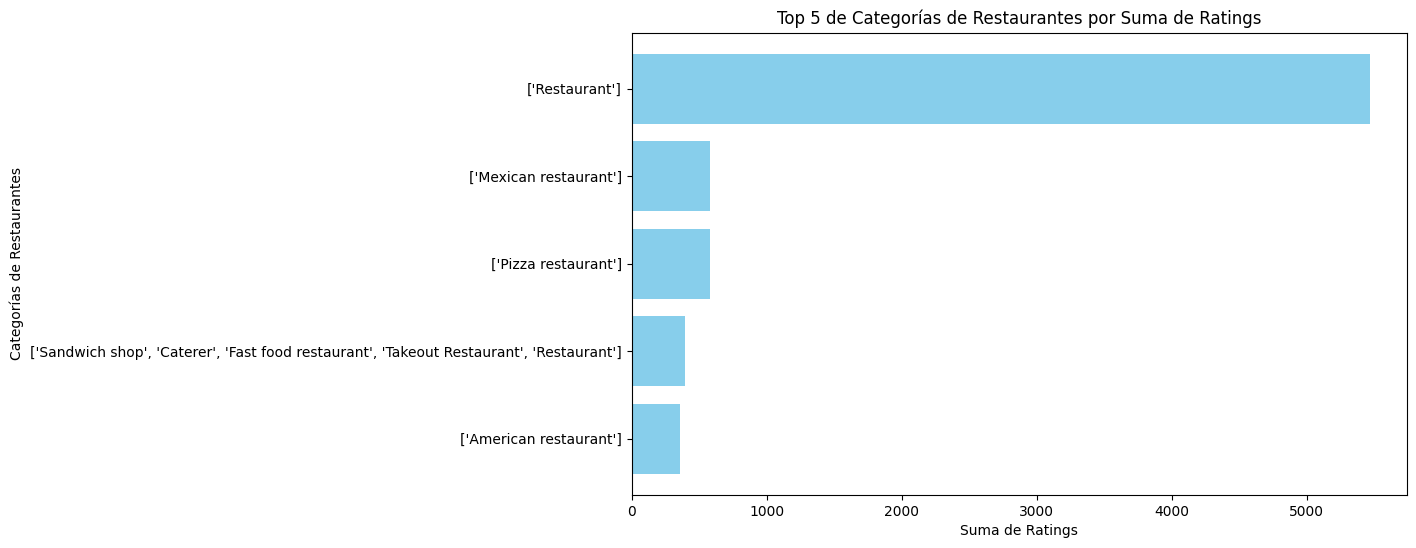

In [230]:
import matplotlib.pyplot as plt

# Suponiendo que 'top_categorias' es el DataFrame con el top 5 de categorías y sus sumas de rating
plt.figure(figsize=(10, 6))
plt.barh(top_categorias['category'], top_categorias['avg_rating'], color='skyblue')
plt.xlabel('Suma de Ratings')
plt.ylabel('Categorías de Restaurantes')
plt.title('Top 5 de Categorías de Restaurantes por Suma de Ratings')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la categoría con mayor rating en la parte superior
plt.show()


 Restaurante que tienen servicio de delivery

In [194]:
# Rellenamos valores faltantes
df_Florida_Google['MISC'].fillna('', inplace=True)
# Observamos los restaurantes que tienen dleivery
delivery = df_Florida_Google[df_Florida_Google['MISC'].str.contains("Delivery", case=False)]
delivery["MISC"].count()

4457

4457 restaurantes tienen servicio de delivery

Grafico Circular, Porcentaje de Restaurantes con y sin Servicio de Delivery en Florida

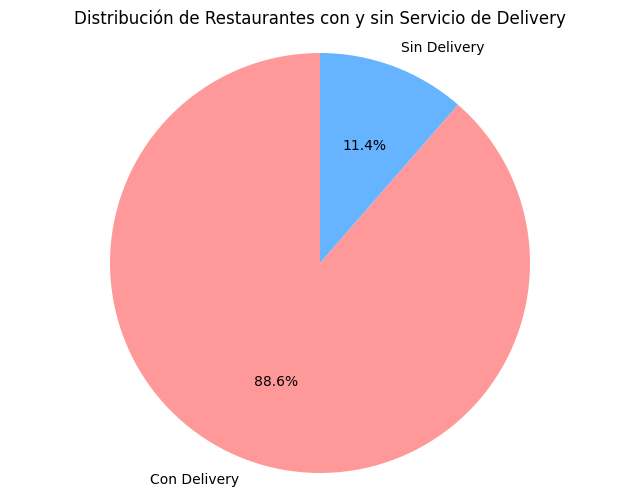

In [198]:
import matplotlib.pyplot as plt

# Datos
total_restaurantes = 5031
con_delivery = 4457
sin_delivery = total_restaurantes - con_delivery

# Etiquetas y valores para el gráfico
etiquetas = ['Con Delivery', 'Sin Delivery']
valores = [con_delivery, sin_delivery]
colores = ['#ff9999','#66b3ff']

# Crear gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Restaurantes con y sin Servicio de Delivery')
plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse

# Mostrar el gráfico
plt.show()


Concatenamos 11 archivos JSON en "metadata-sitios", se procedió a filtrar los 5031 restaurantes ubicados en Florida, excluyendo Fort Lauderdale, Miami, Miami Gardens y Boca Raton. Del total, un 88.6% ofrece servicio de delivery. Entre las principales categorías de restaurantes destacaron los de pizza, los mexicanos, los de comida rápida y los estadounidenses. Basándonos en estos datos, invertir en un restaurante mexicano, preferiblemente con servicio de delivery, podría generar mayores ventas y recibir mejores calificaciones.

## Reviews-Florida

In [ ]:
datos = []
with open('C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\Google maps\\review_Florida\\8.json',"r",encoding="utf-8") as archivo:
    for linea in archivo:
        objeto_json = json.loads(linea)
        datos.append(objeto_json)

df_review_8 = pd.DataFrame(datos)


In [ ]:
datos = []
with open('C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\Google maps\\review_Florida\\10.json',"r",encoding="utf-8") as archivo:
    for linea in archivo:
        objeto_json = json.loads(linea)
        datos.append(objeto_json)

df_review_10 = pd.DataFrame(datos)


In [ ]:
datos = []
with open('C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\Google maps\\review_Florida\\11.json',"r",encoding="utf-8") as archivo:
    for linea in archivo:
        objeto_json = json.loads(linea)
        datos.append(objeto_json)

df_review_11 = pd.DataFrame(datos)


In [ ]:
datos = []
with open('C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\Google maps\\review_Florida\\14.json',"r",encoding="utf-8") as archivo:
    for linea in archivo:
        objeto_json = json.loads(linea)
        datos.append(objeto_json)

df_review_14 = pd.DataFrame(datos)

In [ ]:
datos = []
with open('C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\Google maps\\review_Florida\\17.json',"r",encoding="utf-8") as archivo:
    for linea in archivo:
        objeto_json = json.loads(linea)
        datos.append(objeto_json)

df_review_17 = pd.DataFrame(datos)

In [ ]:
datos = []
with open('C:\\Users\\Giuliano\\Desktop\\Proyecto grupal\\Google maps\\review_Florida\\18.json',"r",encoding="utf-8") as archivo:
    for linea in archivo:
        objeto_json = json.loads(linea)
        datos.append(objeto_json)

df_review_18 = pd.DataFrame(datos)

In [ ]:
merge_1 = pd.merge(df_review_8,df_review_10,on="user_id",how="inner")
merge_2 = pd.merge(merge_1,df_review_11,on="user_id",how="inner")

In [ ]:
lista= ["name_x","time_x","rating_x","text_x","pics_x","resp_x","gmap_id_x","name_y","time_y","rating_y","text_y","pics_y","resp_y","gmap_id_y"]
merge_2 = merge_2.drop(columns=lista)

In [ ]:
merge_3 = pd.merge(merge_2,df_review_14,on="user_id",how="inner")
merge_4 = pd.merge(merge_3,df_review_17,on="user_id",how="inner")

In [ ]:
lista= ["name_x","time_x","rating_x","text_x","pics_x","resp_x","gmap_id_x","name_y","time_y","rating_y","text_y","pics_y","resp_y","gmap_id_y"]
merge_4 = merge_4.drop(columns=lista)
merge_5 = pd.merge(merge_4,df_review_18,on="user_id",how="inner")

In [ ]:
lista= ["name_y","time_y","rating_y","text_y","pics_y","resp_y","gmap_id_y"]
df_reviews_maps = merge_5.drop(columns=lista)

In [ ]:
df_reviews_maps.to_csv("df_reviews_maps.csv")

In [6]:
pd.read_csv("df_reviews_maps.csv")

C:\Users\Giuliano\AppData\Local\Temp\ipykernel_7176\3646677170.py:1: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv("df_reviews_maps.csv")


,Unnamed: 0,user_id,name_x,time_x,rating_x,text_x,pics_x,resp_x,gmap_id_x
0,0,101979910797375182031,Li Zephyr,1583346035826,5,NaN,NaN,NaN,0x88e77c4a94a8278b:0x391d52e0b192f1d3
1,1,113992450246527333718,Erik Kling,1476977652621,5,NaN,NaN,NaN,0x88d0d94e5f4a099d:0x6f78101fcc3b6ed7
2,2,113992450246527333718,Erik Kling,1476977652621,5,NaN,NaN,NaN,0x88d0d94e5f4a099d:0x6f78101fcc3b6ed7
3,3,113992450246527333718,Erik Kling,1476977652621,5,NaN,NaN,NaN,0x88d0d94e5f4a099d:0x6f78101fcc3b6ed7
4,4,113992450246527333718,Erik Kling,1476977652621,5,NaN,NaN,NaN,0x88d0d94e5f4a099d:0x6f78101fcc3b6ed7
...,...,...,...,...,...,...,...,...,...
1427576,1427576,114197646375603773697,Adrian Oropeza,1600984670010,5,"Outstanding quality, service, honesty, prices ...",NaN,NaN,0x88d908719a5ea8c9:0xbd0669172d9fb0b2
1427577,1427577,114197646375603773697,Adrian Oropeza,1600984670010,5,"Outstanding quality, service, honesty, prices ...",NaN,NaN,0x88d908719a5ea8c9:0xbd0669172d9fb0b2
1427578,1427578,114197646375603773697,Adrian Oropeza,1600984670010,5,"Outstanding quality, service, honesty, prices ...",NaN,NaN,0x88d908719a5ea8c9:0xbd0669172d9fb0b2
1427579,1427579,114197646375603773697,Adrian Oropeza,1600984670010,5,"Outstanding quality, service, honesty, prices ...",NaN,NaN,0x88d908719a5ea8c9:0xbd0669172d9fb0b2


In [7]:
df_reviews_maps

,Unnamed: 0,user_id,name_x,time_x,rating_x,text_x,pics_x,resp_x,gmap_id_x
0,0,101979910797375182031,Li Zephyr,1583346035826,5,NaN,NaN,NaN,0x88e77c4a94a8278b:0x391d52e0b192f1d3
1,1,113992450246527333718,Erik Kling,1476977652621,5,NaN,NaN,NaN,0x88d0d94e5f4a099d:0x6f78101fcc3b6ed7
2,2,113992450246527333718,Erik Kling,1476977652621,5,NaN,NaN,NaN,0x88d0d94e5f4a099d:0x6f78101fcc3b6ed7
3,3,113992450246527333718,Erik Kling,1476977652621,5,NaN,NaN,NaN,0x88d0d94e5f4a099d:0x6f78101fcc3b6ed7
4,4,113992450246527333718,Erik Kling,1476977652621,5,NaN,NaN,NaN,0x88d0d94e5f4a099d:0x6f78101fcc3b6ed7
...,...,...,...,...,...,...,...,...,...
1427576,1427576,114197646375603773697,Adrian Oropeza,1600984670010,5,"Outstanding quality, service, honesty, prices ...",NaN,NaN,0x88d908719a5ea8c9:0xbd0669172d9fb0b2
1427577,1427577,114197646375603773697,Adrian Oropeza,1600984670010,5,"Outstanding quality, service, honesty, prices ...",NaN,NaN,0x88d908719a5ea8c9:0xbd0669172d9fb0b2
1427578,1427578,114197646375603773697,Adrian Oropeza,1600984670010,5,"Outstanding quality, service, honesty, prices ...",NaN,NaN,0x88d908719a5ea8c9:0xbd0669172d9fb0b2
1427579,1427579,114197646375603773697,Adrian Oropeza,1600984670010,5,"Outstanding quality, service, honesty, prices ...",NaN,NaN,0x88d908719a5ea8c9:0xbd0669172d9fb0b2
